# **Libraries**
---

In [1]:
import sys
import os
os.chdir('..')

# Import necessary libraries
import pandas as pd
import numpy as np
import math
import string
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import warnings
warnings.filterwarnings('ignore')


# Set style for plots
plt.style.use('default')
sns.set_palette("husl")

# Module
from src.modules.processing import DataLoader

# **Import Data**
---

In [2]:
data_loader = DataLoader()

# Load datasets
original_df = data_loader.load_original_dataset()
competition_train_df, competition_test_df = data_loader.load_competition_datasets()

# Combine datasets
bank_data = data_loader.combine_datasets()

# **Exploratory**
---

In [3]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175034 entries, 0 to 175033
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Balance          175034 non-null  float64
 1   CreditScore      175034 non-null  int64  
 2   IsActiveMember   175034 non-null  float64
 3   EstimatedSalary  175034 non-null  float64
 4   Age              175034 non-null  float64
 5   Geography        175034 non-null  object 
 6   NumOfProducts    175034 non-null  int64  
 7   Exited           175034 non-null  int64  
 8   Gender           175034 non-null  object 
 9   Tenure           175034 non-null  int64  
 10  HasCrCard        175034 non-null  float64
dtypes: float64(5), int64(4), object(2)
memory usage: 14.7+ MB


In [4]:
bank_data.describe()

,Balance,CreditScore,IsActiveMember,EstimatedSalary,Age,NumOfProducts,Exited,Tenure,HasCrCard
count,175034.000000,175034.000000,175034.00000,175034.000000,175034.000000,175034.00000,175034.000000,175034.000000,175034.000000
mean,56678.299368,656.115835,0.49876,111861.556577,38.171360,1.55307,0.211148,5.019922,0.751185
std,62982.565768,81.151171,0.50000,50815.382991,8.969552,0.54921,0.408124,2.811136,0.432327
min,0.000000,350.000000,0.00000,11.580000,18.000000,1.00000,0.000000,0.000000,0.000000
25%,0.000000,597.000000,0.00000,73192.370000,32.000000,1.00000,0.000000,3.000000,1.000000
50%,0.000000,659.000000,0.00000,116969.730000,37.000000,2.00000,0.000000,5.000000,1.000000
75%,120729.297500,710.000000,1.00000,154767.340000,42.000000,2.00000,0.000000,7.000000,1.000000
max,250898.090000,850.000000,1.00000,199992.480000,92.000000,4.00000,1.000000,10.000000,1.000000


In [5]:
# Check for missing values
print("Missing values per column:")
print(bank_data.isnull().sum())

Missing values per column:
Balance            0
CreditScore        0
IsActiveMember     0
EstimatedSalary    0
Age                0
Geography          0
NumOfProducts      0
Exited             0
Gender             0
Tenure             0
HasCrCard          0
dtype: int64


In [6]:
# Check for duplicated values
duplicate_count = bank_data.duplicated().sum()
print(f"Number of duplicated rows: {duplicate_count}")

# If duplicates exist, drop them
if duplicate_count > 0:
    bank_data = bank_data.drop_duplicates()
    print("Duplicated rows have been removed.")
else:
    print("No duplicated rows found.")

Number of duplicated rows: 569
Duplicated rows have been removed.


In [7]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 174465 entries, 0 to 175033
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Balance          174465 non-null  float64
 1   CreditScore      174465 non-null  int64  
 2   IsActiveMember   174465 non-null  float64
 3   EstimatedSalary  174465 non-null  float64
 4   Age              174465 non-null  float64
 5   Geography        174465 non-null  object 
 6   NumOfProducts    174465 non-null  int64  
 7   Exited           174465 non-null  int64  
 8   Gender           174465 non-null  object 
 9   Tenure           174465 non-null  int64  
 10  HasCrCard        174465 non-null  float64
dtypes: float64(5), int64(4), object(2)
memory usage: 16.0+ MB


# **One-Dimensional Analysis**
---

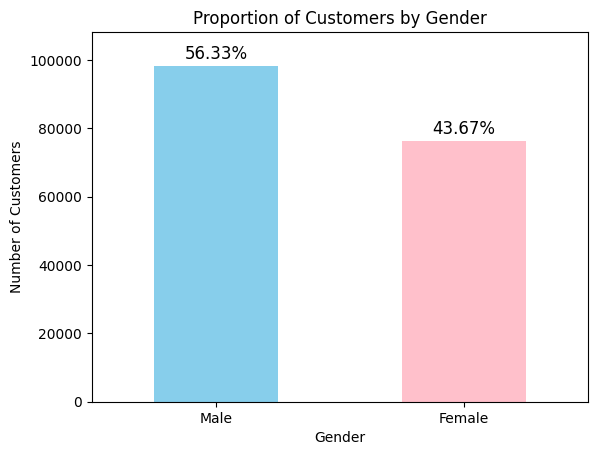

In [8]:
# Proporation - GENDER

gender_counts = bank_data['Gender'].value_counts()
total = gender_counts.sum()

gender_colors = ['pink' if gender == 'Female' else 'skyblue' for gender in gender_counts.index]

ax = gender_counts.plot(kind='bar', color=gender_colors)

plt.title("Proportion of Customers by Gender")
plt.ylabel("Number of Customers")
plt.xlabel("Gender")
plt.xticks(rotation=0)
plt.ylim(0, gender_counts.max() * 1.1)

for i, v in enumerate(gender_counts):
    percent = v / total * 100
    ax.text(i, v + gender_counts.max()*0.01, f"{percent:.2f}%", 
            ha='center', va='bottom', fontsize=12)

plt.show()


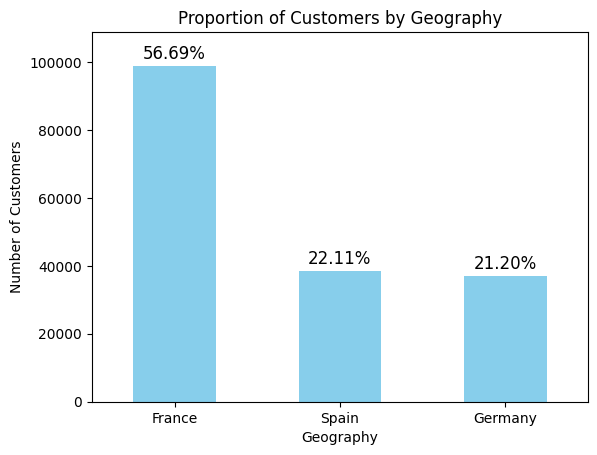

In [9]:
# Proporation - GEOGRAPHY
geo_counts = bank_data['Geography'].value_counts()
total = geo_counts.sum()

ax = geo_counts.plot(kind='bar', color='skyblue')

plt.title("Proportion of Customers by Geography")
plt.ylabel("Number of Customers")
plt.xlabel("Geography")
plt.xticks(rotation=0)
plt.ylim(0, geo_counts.max() * 1.1)

for i, v in enumerate(geo_counts):
    percent = v / total * 100
    ax.text(i, v + geo_counts.max()*0.01, f"{percent:.2f}%", 
            ha='center', va='bottom', fontsize=12)

plt.show()


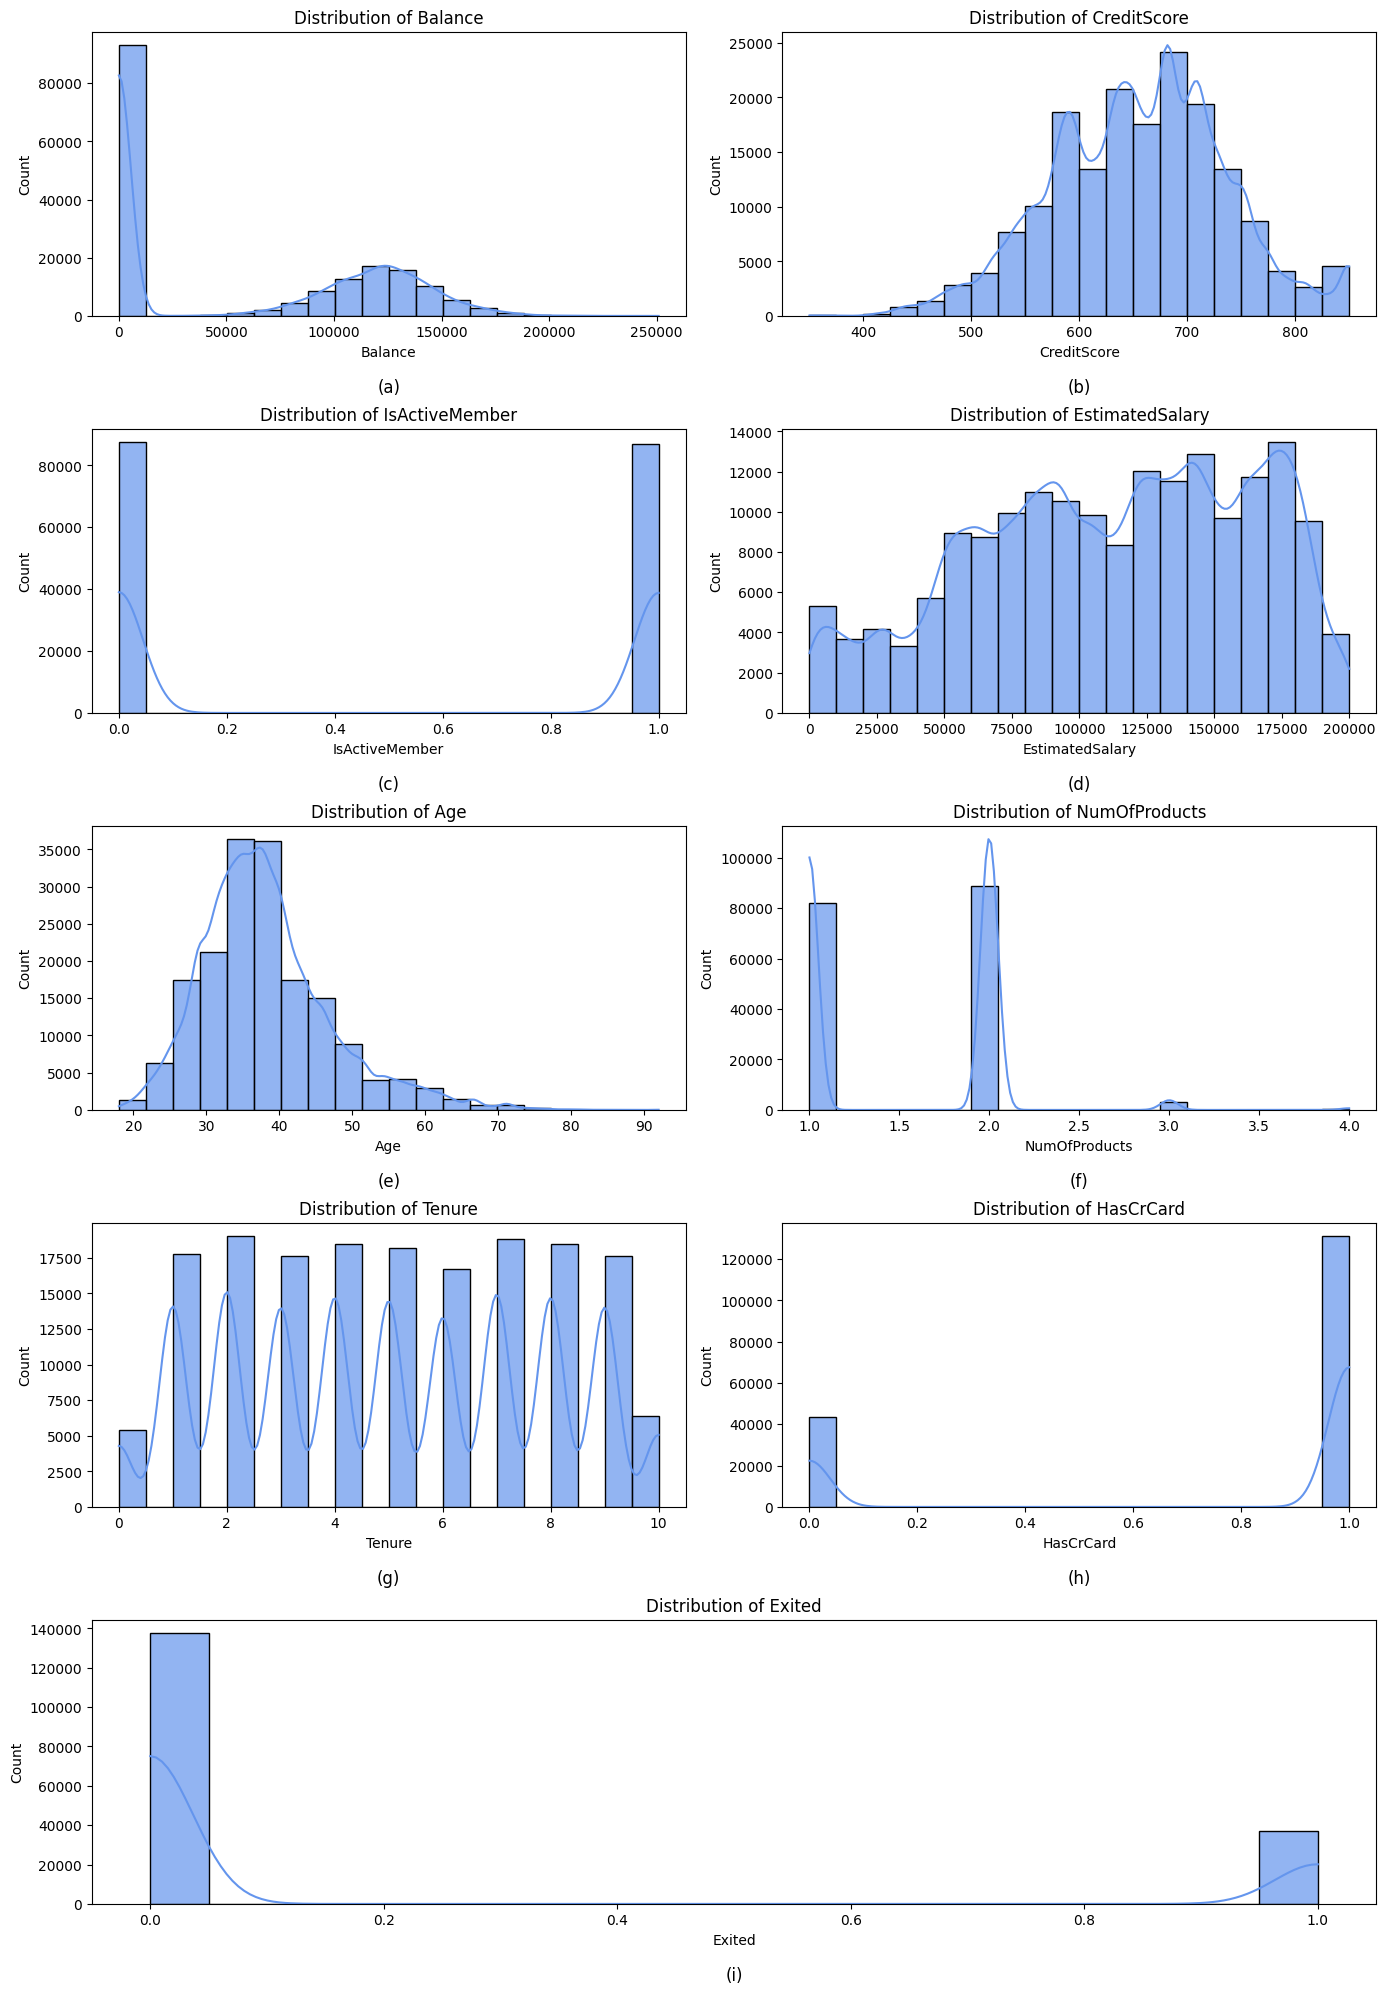

In [10]:
num_cols = bank_data.select_dtypes(include=['int64', 'float64']).columns.tolist()


if 'Exited' in num_cols:
    num_cols.remove('Exited')
    num_cols.append('Exited')

n = len(num_cols) - 1  

ncols = 2
nrows = math.ceil(n / ncols) + 1  

fig = plt.figure(figsize=(14, 4 * nrows))
gs = fig.add_gridspec(nrows, ncols)

# a, b, c...
labels = list(string.ascii_lowercase)

for i, col in enumerate(num_cols[:-1]):
    row = i // ncols
    col_idx = i % ncols
    ax = fig.add_subplot(gs[row, col_idx])
    sns.histplot(bank_data[col], kde=True, bins=20,
                 color='cornflowerblue', edgecolor='black', alpha=0.7, ax=ax)
    ax.set_title(f"Distribution of {col}")
    ax.set_xlabel(col)
    ax.set_ylabel("Count")

    # (a), (b), ...
    ax.text(0.5, -0.25, f"({labels[i]})", transform=ax.transAxes,
            ha='center', va='center', fontsize=12)

ax = fig.add_subplot(gs[-1, :])
sns.histplot(bank_data['Exited'], kde=True, bins=20,
             color='cornflowerblue', edgecolor='black', alpha=0.7, ax=ax)
ax.set_title("Distribution of Exited")
ax.set_xlabel("Exited")
ax.set_ylabel("Count")

ax.text(0.5, -0.25, f"({labels[len(num_cols)-1]})", transform=ax.transAxes,
        ha='center', va='center', fontsize=12)

plt.tight_layout()
plt.show()


# **Two-Dimensional Analysis**
---

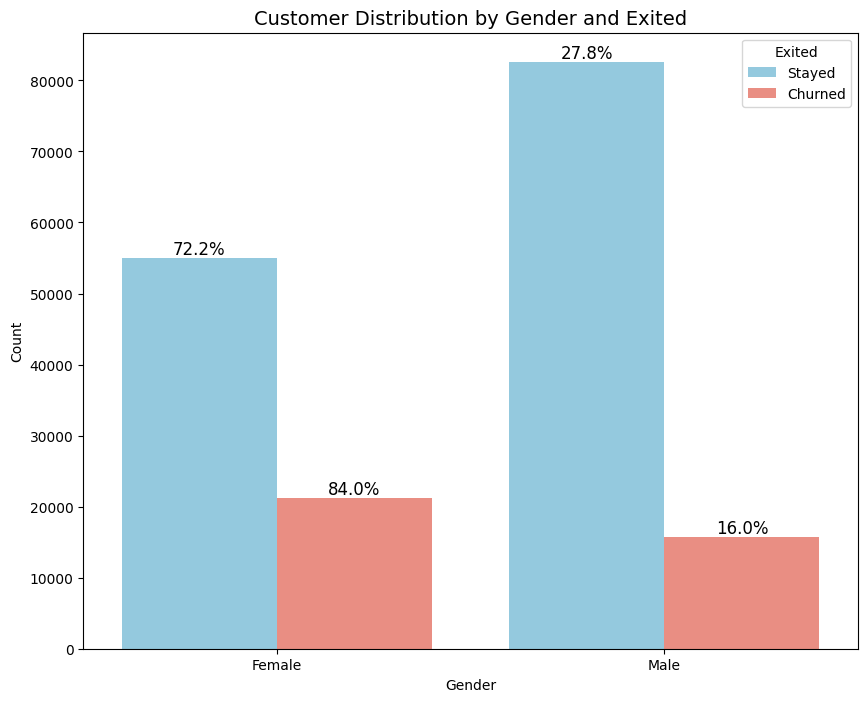

In [ ]:
# Customer Distribution by Gender and Exited
gender_exited_counts = bank_data.groupby(['Gender', 'Exited']).size().reset_index(name='Count')

gender_exited_counts['Exited_Label'] = gender_exited_counts['Exited'].map({0: "Stayed", 1: "Churned"})

gender_exited_counts['Percentage'] = gender_exited_counts.groupby('Gender')['Count'].transform(
    lambda x: 100 * x / x.sum()
)


plt.figure(figsize=(10,8))
ax = sns.barplot(
    data=gender_exited_counts, 
    x='Gender', 
    y='Count', 
    hue='Exited_Label', 
    palette={"Stayed": "skyblue", "Churned": "salmon"}
)

# Annotate %
for p, perc in zip(ax.patches, gender_exited_counts['Percentage']):
    height = p.get_height()
    ax.annotate(f'{perc:.1f}%', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='bottom', fontsize=12)

plt.title("Customer Distribution by Gender and Exited", fontsize=14)
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(title="Exited")
plt.show()


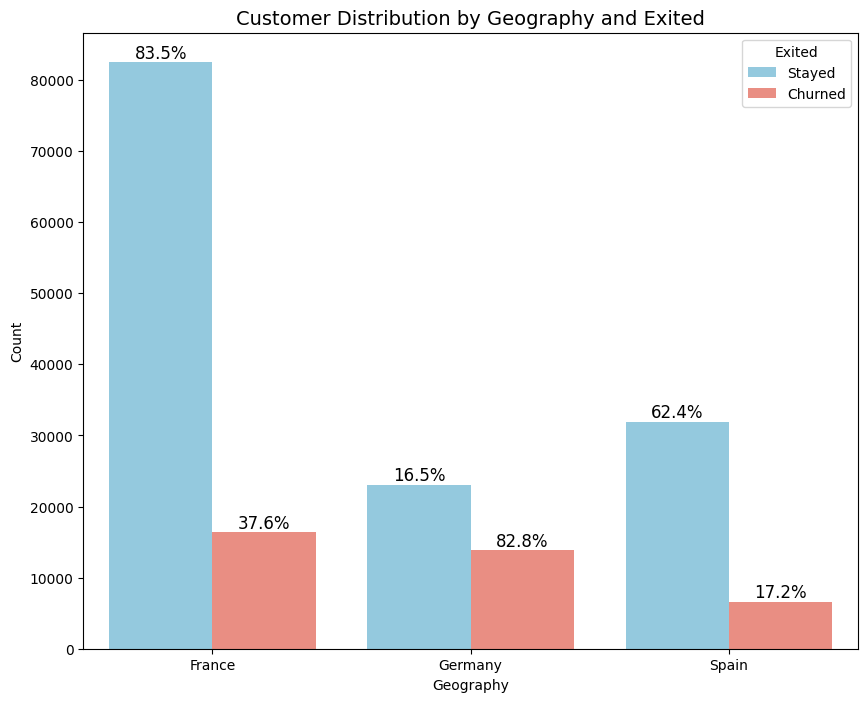

In [18]:
# Customer Distribution by Geography and Exited
geo_exited_counts = bank_data.groupby(['Geography', 'Exited']).size().reset_index(name='Count')

geo_exited_counts['Exited_Label'] = geo_exited_counts['Exited'].map({0: "Stayed", 1: "Churned"})

geo_exited_counts['Percentage'] = geo_exited_counts.groupby('Geography')['Count'].transform(
    lambda x: 100 * x / x.sum()
)


plt.figure(figsize=(10,8))
ax = sns.barplot(
    data=geo_exited_counts, 
    x='Geography', 
    y='Count', 
    hue='Exited_Label', 
    palette={"Stayed": "skyblue", "Churned": "salmon"}
)

# Annotate %
for p, perc in zip(ax.patches, geo_exited_counts['Percentage']):
    height = p.get_height()
    ax.annotate(f'{perc:.1f}%', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='bottom', fontsize=12)

plt.title("Customer Distribution by Geography and Exited", fontsize=14)
plt.xlabel("Geography")
plt.ylabel("Count")
plt.legend(title="Exited")
plt.show()


## **Correlation**
---

In [19]:
# Find the correlation between numerical variables
corr_matrix = bank_data.corr(numeric_only=True)
print(corr_matrix)

                  Balance  CreditScore  IsActiveMember  EstimatedSalary  \
Balance          1.000000     0.005529       -0.013984         0.004262   
CreditScore      0.005529     1.000000        0.015459        -0.000795   
IsActiveMember  -0.013984     0.015459        1.000000        -0.008586   
EstimatedSalary  0.004262    -0.000795       -0.008586         1.000000   
Age              0.063585    -0.008924        0.008665        -0.006882   
NumOfProducts   -0.357084     0.011571        0.037679        -0.002524   
Exited           0.128504    -0.027381       -0.207322         0.018393   
Tenure          -0.009727     0.001318       -0.006664         0.001604   
HasCrCard       -0.020141    -0.002291       -0.021045         0.005412   

                      Age  NumOfProducts    Exited    Tenure  HasCrCard  
Balance          0.063585      -0.357084  0.128504 -0.009727  -0.020141  
CreditScore     -0.008924       0.011571 -0.027381  0.001318  -0.002291  
IsActiveMember   0.008665  

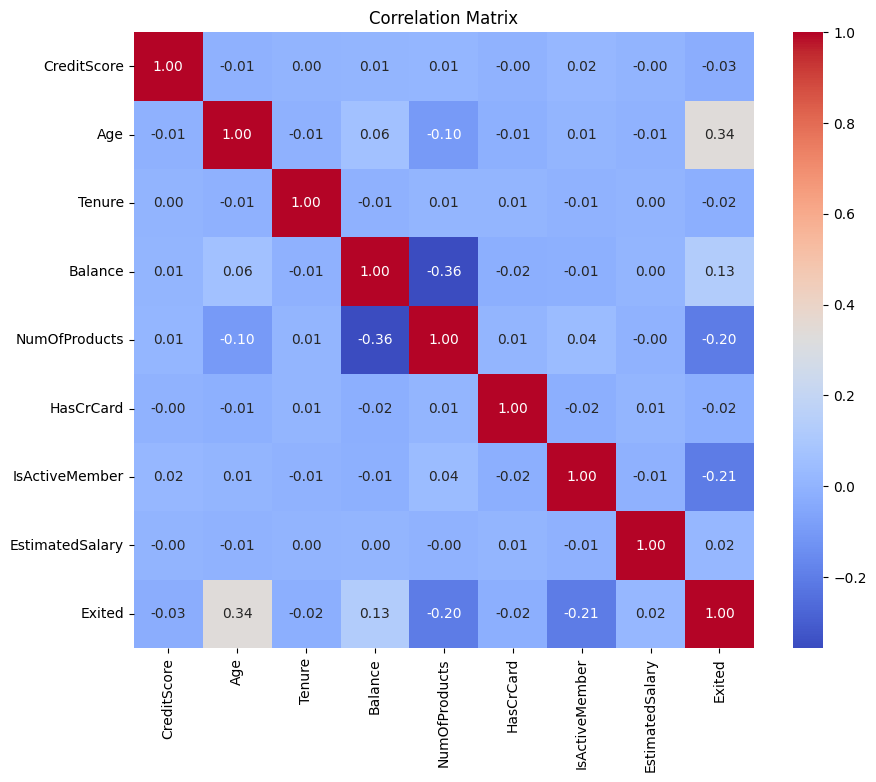

In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import pairwise_distances

num_features = ["CreditScore", "Age", "Tenure", "Balance", "NumOfProducts", "HasCrCard", "IsActiveMember", "EstimatedSalary", "Exited"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(bank_data[num_features])

corr_matrix = np.corrcoef(X_scaled, rowvar=False)

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", xticklabels=num_features, yticklabels=num_features)
plt.title("Correlation Matrix")
plt.show()

